In [2]:
import pandas as pd
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# 파이그래프에서 한국어 나오게 하는 코드 

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

## EDA

In [4]:
shelter= pd.read_csv('전국지진해일대피소표준데이터.csv', encoding = "CP949")

In [5]:
len(shelter)

10305

In [6]:
shelter.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
0,내수2근린공원,지진대피소,옥외대피소,공원,서울특별시 종로구 경희궁4길,서울특별시 종로구 내수동 73-3,37.572387,126.971583,2192.0,664.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
1,대동세무고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 계동길 84-10,NaN,37.581920,126.987930,2000.0,1000.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
2,대신고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 사직로 9,NaN,37.572915,126.961601,4663.0,1413.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
3,덕성여자고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 50,NaN,37.577918,126.982867,4180.0,1260.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
4,덕성여자중학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 49,NaN,37.577945,126.981778,6701.0,2030.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN


In [7]:
shelter.dtypes

지진해일대피소명         object
지진해일대피소구분        object
지진해일대피소유형        object
지진해일대피소유형구분      object
소재지도로명주소         object
소재지지번주소          object
위도              float64
경도              float64
수용가능면적          float64
최대수용인원수         float64
지진해일대피소운영상태      object
지진해일대피소전화번호      object
부대편의시설           object
주민대피지구명          object
주민대피지구내가구수      float64
주민대피지구내거주인수     float64
주민대피지구내재해약자수    float64
내진적용여부           object
내진설계등급           object
해안선이격거리         float64
해발높이            float64
지진대피안내표지판수      float64
긴급대피장소안내표지판수    float64
지진대피로안내표지판수     float64
관리기관명            object
관리기관전화번호         object
데이터기준일자          object
제공기관코드            int64
제공기관명            object
Unnamed: 29     float64
dtype: object

In [8]:
shelter.isnull().sum() #내진설계등급 missing data가10021 장난??

지진해일대피소명            0
지진해일대피소구분           0
지진해일대피소유형           0
지진해일대피소유형구분         0
소재지도로명주소          926
소재지지번주소          5684
위도                 92
경도                 91
수용가능면적              0
최대수용인원수             0
지진해일대피소운영상태         0
지진해일대피소전화번호         0
부대편의시설           9861
주민대피지구명             0
주민대피지구내가구수       9763
주민대피지구내거주인수      9870
주민대피지구내재해약자수    10023
내진적용여부              0
내진설계등급          10021
해안선이격거리          9348
해발높이             9274
지진대피안내표지판수       7502
긴급대피장소안내표지판수     9270
지진대피로안내표지판수      9684
관리기관명               0
관리기관전화번호         3749
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 29     10305
dtype: int64

### 소재지도로명주소 null value 채우기

In [9]:
shelter[shelter['소재지도로명주소'].isnull()] #전에 >=65 조건절 준 느낌

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
1042,강하생활체육공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 강하면 운심리 57번지,37.497379,127.413071,10000.0,12121.0,...,32.0,1.0,0.0,0.0,강하면,031-770-3089,2019-03-01,4170000,경기도 양평군,NaN
1046,단월레포츠공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 단월면 보룡리 산 11-1,37.544436,127.670154,10000.0,12121.0,...,112.0,1.0,0.0,0.0,단월면,031-770-3213,2019-03-01,4170000,경기도 양평군,NaN
1052,서동공원 서문주차장,지진대피소,옥외대피소,기타,NaN,충청남도 부여군 부여읍 동남리 172-1,36.271127,126.909818,13736.0,4000.0,...,NaN,0.0,0.0,0.0,충청남도 부여군청,041-830-2630,2018-10-01,4570000,충청남도 부여군,NaN
1098,솔터체육공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 마산동 642-1,37.640454,126.649226,193990.0,58785.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1099,모담공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1325-1,37.648470,126.689301,536255.0,162501.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1100,조류생태공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1246-1,37.657766,126.690011,565295.0,171301.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1101,걸포중앙공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 걸포동 1553,37.638067,126.706824,134481.0,40752.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1102,한강신도시 근린7호 공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 장기동 1888-15,37.641139,126.658917,99736.0,30223.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1103,양곡 제4근린공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 양촌읍 양곡리 1331,37.653057,126.629209,42860.0,12988.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1104,골드밸리 근린5호,지진대피소,옥외대피소,공원,NaN,경기도 김포시 양촌읍 학운리 3152,37.621077,126.629363,42308.0,12821.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN


In [10]:
len(shelter[shelter['소재지도로명주소'].isnull()])

926

#### 소재지도로명주소, 소재지지번주소 둘다 빈 행이 없다는 것 확인

In [11]:
len(shelter[shelter['소재지도로명주소'].isnull()&shelter['소재지지번주소'].isnull()])

0

In [12]:
shelter[shelter['소재지도로명주소'].isnull()].head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
1042,강하생활체육공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 강하면 운심리 57번지,37.497379,127.413071,10000.0,12121.0,...,32.0,1.0,0.0,0.0,강하면,031-770-3089,2019-03-01,4170000,경기도 양평군,NaN
1046,단월레포츠공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 단월면 보룡리 산 11-1,37.544436,127.670154,10000.0,12121.0,...,112.0,1.0,0.0,0.0,단월면,031-770-3213,2019-03-01,4170000,경기도 양평군,NaN
1052,서동공원 서문주차장,지진대피소,옥외대피소,기타,NaN,충청남도 부여군 부여읍 동남리 172-1,36.271127,126.909818,13736.0,4000.0,...,NaN,0.0,0.0,0.0,충청남도 부여군청,041-830-2630,2018-10-01,4570000,충청남도 부여군,NaN
1098,솔터체육공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 마산동 642-1,37.640454,126.649226,193990.0,58785.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1099,모담공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1325-1,37.648470,126.689301,536255.0,162501.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN


#### 소재지지번주소로 부터 가져오기

In [13]:
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].fillna(shelter['소재지지번주소'])

In [14]:
shelter[shelter['소재지도로명주소'].isnull()] #result; 0row

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29


### area컬럼을 만들어 '소재지도로명주소' 띄어쓰기 전까지 잘라서 '강원'으로 담기

#### 한솔님 코드 참조

In [15]:
# 소재지도로명주소 string타입으로 변형 (data type이 이미 object면 str아닌가??)
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].astype('str')

In [16]:
# 소재지도로명 띄어쓰기 기준으로 잘라 첫번째 덩어리만 area 컬럼에 저장
shelter['area'] = shelter['소재지도로명주소'].str.split(' ').str[0]

In [17]:
shelter.area.unique()

array(['서울특별시', '충청북도', '경기도', '인천광역시', '경상남도', '강원도', '전라북도', '광주광역시',
       '경상북도', '충청남도', '부산광역시', '대구광역시', '전라남도', '대전광역시', '울산광역시',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [18]:
shelter_GW = shelter[(shelter['area']=='강원도')]

In [19]:
shelter_GW.area.unique() #what is area for???

array(['강원도'], dtype=object)

### shelter_GW  분석 스타트

### null value가 있는 칼럼찾기

In [20]:
shelter_GW.shape

(518, 31)

In [21]:
len(shelter_GW)

518

In [22]:
# 컬럼별 null값 찾기
data = shelter_GW.isnull().sum()
pd.DataFrame(data)

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,105
위도,1
경도,1
수용가능면적,0
최대수용인원수,0


### null value가 있는 칼럼
*소재지지번주소 -> 소재지도로명주소를 사용하면 돼

*위도 
*경도 -> 위도, 경로는 missing이 하나여서 fill가능 할듯

*부대편의시설

*주민대피지구내가구수
*주민대피지구내거주인수
*주민대피지구내재해약자수

*내진설계등급

*해안선이격거리
*해발높이 -> 주변이 해변이라 의미가 있을 것같기도 하고 아닌것 같기도 하고

*지진대피안내표지판수
*긴급대피장소안내표지판수
*지진대피로안내표지판수 -> 필요할까???

*관리기관전화번호 : 필요없음


## 위도, 경도 null value 채우기(한솔님꺼 참조)

In [23]:
nulls = shelter_GW[shelter_GW['위도'].isnull()]

kakao api 사용해서 위도, 경도 결측치 채우기 
kakao api는 하루에 사용량이 제한되어있데!!!

In [24]:
--아샬님 코드.....
# import os
# import requests


# key = os.environ['KAKAO_REST_API_KEY']


# def geocode(address):
#     url = 'https://dapi.kakao.com/v2/local/search/address.json'
#     params = {'query': address}
#     headers = {'Authorization': 'KakaoAK ' + key}
#     r = requests.get(url, params=params, headers=headers)
#     results = r.json()['documents']
#     if not results:
#         return None, None
#     address = results[0]['address']
#     return float(address['y']), float(address['x'])

# if __name__ == '__main__':
#     lat, lng = geocode('서울특별시 마포구 백범로31길 21 창업허브')
#     assert lat == 37.54674671893906
#     assert lng == 126.94997413872638

SyntaxError: invalid syntax (<ipython-input-24-93aa2f32da5f>, line 1)

! pip uninstall geocoder

pip install geocoder  #이거 아니야 하지마!!!!

In [ ]:
from geocoder import geocode

#한솔님코드 하루에 많이 못쓰니까 한번 사용하고 주석처리 해야되!!!

lats = []
lngs = []

for i, index in enumerate(nulls.index):
    print(i + 1, '-', index)
    lat, lng = geocode(nulls['소재지도로명주소'][index])
    lats.append(lat)
    lngs.append(lng)

nulls = nulls.assign(lat=lats, lng=lngs)

nulls.head()



#젠장ㅋㅋㅋ 구글 맵으로 위도,경도 걍 찾음
실내초등학교

(38.120824, 127.531726)

In [25]:
nulls["위도"].fillna("38.120866", inplace = True)

C:\Users\sooyeon\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [26]:
nulls["경도"].fillna("127.53147", inplace = True)

In [27]:
nulls

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area
6820,실내초등학교 운동장,지진대피소,옥외대피소,운동장,강원도 화천군 사내면실내길 26,강원도 화천군 사내면 명월리 산28-12,38.120866,127.53147,2652.0,800.0,...,NaN,NaN,NaN,실내초등학교,033-441-1492,2018-08-10,4310000,강원도 화천군,NaN,강원도


In [ ]:
nulls.to_csv('nulls.csv') #api 사용 쿼타때문에 csv로 저장한 후 사용

에러 원인 찾지못해- LocationIQ 돌리기 but, 나는 필요없짛ㅎ

In [ ]:
# import os 
# import requests

In [ ]:
# LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [ ]:
# def gc(address):
#     url = 'https://us1.locationiq.com/v1/search.php'
#     payload = {
#         'key': LOCATIONIQ_TOKEN,
#         'q': address,
#         'format': 'json'
#     }
#     response = requests.get(url, params=payload)
#     results = response.json()
#     if 'error' in results:
#         return None, None
#     coordinates = results[0]
#     return coordinates['lat'], coordinates['lon']

In [ ]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = gc(nulls['소재지도로명주소'][index])
#     lats.append(lat or 0)
#     lngs.append(lng or 0)

# nulls = nulls.assign(위=lats, 경=lngs)

# nulls.head()

```
두 개 다 돌렸는데도 못찾은 위도, 경도는 손수 노가다로 찾아서 작성
손수 수정하다가 필요없는 컬럼은 삭제했음 (코드로 대체 가능)
```

In [ ]:
nulls = pd.read_csv('nulls.csv')

In [28]:
nulls.head(10)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area
6820,실내초등학교 운동장,지진대피소,옥외대피소,운동장,강원도 화천군 사내면실내길 26,강원도 화천군 사내면 명월리 산28-12,38.120866,127.53147,2652.0,800.0,...,NaN,NaN,NaN,실내초등학교,033-441-1492,2018-08-10,4310000,강원도 화천군,NaN,강원도


In [29]:
nulls.columns

Index(['지진해일대피소명', '지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '위도', '경도', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 29', 'area'],
      dtype='object')

In [30]:
nulls.drop(['지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 29', 'area'], axis=1, inplace=True) 

C:\Users\sooyeon\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


이제 nulls랑 기존 데이터 set이랑 merge할꺼야

In [31]:
shelter_GW2 = shelter_GW.merge(nulls, how='left', on='지진해일대피소명')

In [32]:
len(shelter_GW2) 

518

In [ ]:
shelter_GW2.columns #으악 이거 뭐야?ㅋㅋㅋㅋㅋ

In [33]:
shelter_GW2.head(10)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도_x,경도_x,수용가능면적,최대수용인원수,...,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area,위도_y,경도_y
0,양구레포츠공원풋살장,지진대피소,옥외대피소,체육관,강원도 양구군 양구읍 박수근로 366-24,NaN,38.105479,127.982679,3000.0,3500.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
1,종합운동장,지진대피소,옥외대피소,운동장,강원도 양구군 양구읍 함춘로 25-9,NaN,38.109651,127.984487,18000.0,22000.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
2,초롱이테니스장,지진대피소,옥외대피소,체육관,강원도 양구군 양구읍 함춘로 102,NaN,38.116720,127.988463,23800.0,28000.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
3,강원외국어고등학교운동장,지진대피소,옥외대피소,학교,강원도 양구군 양구읍 금강산로 437-12,NaN,38.120893,127.990212,8000.0,9700.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
4,비봉초등학교운동장,지진대피소,옥외대피소,학교,강원도 양구군 양구읍 관공서로 56,NaN,38.110459,127.987795,5000.0,6060.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
5,남면풋살경기장,지진대피소,옥외대피소,체육관,강원도 양구군 남면 용하리408-4,NaN,38.109709,128.036430,4000.0,4800.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
6,용하초등학교 운동장,지진대피소,옥외대피소,학교,강원도 양구군 남면 정중앙로 624-7,NaN,38.109938,128.035284,10000.0,12000.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
7,임당초등학교 운동장,지진대피소,옥외대피소,학교,강원도 양구군 동면 금강산로 1673,NaN,38.201496,128.043009,6500.0,7800.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
8,방산초등학교 운동장,지진대피소,옥외대피소,학교,강원도 양구군 방산면 평화로 5121-7,NaN,38.209971,127.944254,7400.0,9000.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN
9,해안중학교 운동장,지진대피소,옥외대피소,학교,강원도 양구군 해안면 펀치볼로 1279,NaN,38.284271,128.136004,8500.0,10300.0,...,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도,NaN,NaN


In [34]:
 #nulls 테이블에 있던 위도 경도 shelter_GW 테이블 위도 경도로 옮기기
shelter_GW2['위도_x'] = shelter_GW2['위도_x'].fillna(shelter_GW2['위도_y'])

In [35]:
shelter_GW2['경도_x'] = shelter_GW2['경도_x'].fillna(shelter_GW2['경도_y'])

In [36]:
shelter_GW2.drop(['위도_y', '경도_y'], axis=1, inplace=True)

In [37]:
pd.DataFrame(shelter_GW2.isnull().sum()) #위도, 경도 결측치 다 채운 것 확인완료 

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,105
위도_x,0
경도_x,0
수용가능면적,0
최대수용인원수,0


## EDA

## 1. 지진해일대피소유형 분석

### 내진설계 분석

In [38]:
shelter_gangwon = shelter_GW2

In [39]:
shelter_gangwon['지진해일대피소유형'].value_counts()

옥외대피소          277
지진해일 긴급대피장소    186
실내대피소           55
Name: 지진해일대피소유형, dtype: int64

Text(0, 0.5, '')

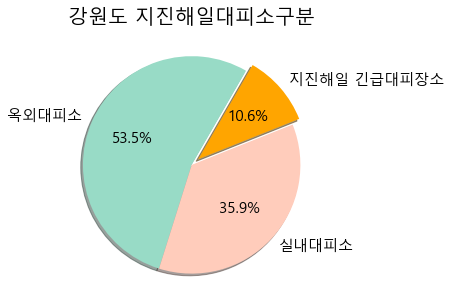

In [40]:
labels=['옥외대피소', '실내대피소', '지진해일 긴급대피장소']
shelter_GW2['지진해일대피소유형'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB', 'ORANGE']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0,0.08) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('강원도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

## 2.내진설계 분석
- 실내 대피소 중 내질설계가 되어있는 대피소는 얼마나 될까?

In [41]:
indoor_shelter = shelter_gangwon[shelter_gangwon['지진해일대피소유형']=='실내대피소']

# 실내 대피소만 내진설계가 가능하기 때문에 실내 대피소만 

In [42]:
seismic_design = len(indoor_shelter[indoor_shelter['내진적용여부']=='적용'])/len(indoor_shelter)*100
print('강원 내진설계 비율 = ', seismic_design, '%')

강원 내진설계 비율 =  54.54545454545454 %


Text(0, 0.5, '')

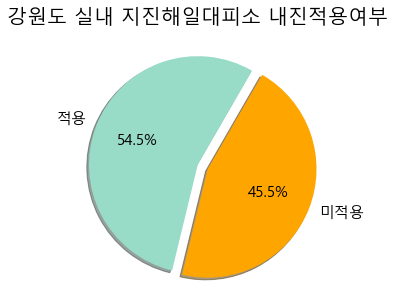

In [43]:
labels=['적용', '미적용']   #항상 파이그래프 보면서 labe순서 제대로 설정했는지 확인

indoor_shelter['내진적용여부'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', 'orange'] #색깔 지정 (색깔 코드 인터넷 검색)
                    ,startangle = 60                #시작 각도 설정
                    ,shadow = True                  #그림자 생성
                    ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
                    ,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
                    ,figsize=(5, 5)                 # 그래프 사이즈 설정 
                    ,fontsize = 15)                 # 글씨 크기 설정
plt.title('강원도 실내 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정

pylab.ylabel('')    # y축 설명 없애기 

## 3. 지진 대피소와 지진해일 대피소 차이는??

In [44]:
shelter_GW2['지진해일대피소구분'].unique()

array(['지진대피소', '지진해일대피소'], dtype=object)

In [45]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
import folium
from folium import Map
from folium.plugins import HeatMap

## 지진대피소, 지진해일대피소 지도에 찍어봄

In [47]:
GW = shelter_gangwon
GW.head(5)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도_x,경도_x,수용가능면적,최대수용인원수,...,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area
0,양구레포츠공원풋살장,지진대피소,옥외대피소,체육관,강원도 양구군 양구읍 박수근로 366-24,NaN,38.1055,127.983,3000.0,3500.0,...,1.0,NaN,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도
1,종합운동장,지진대피소,옥외대피소,운동장,강원도 양구군 양구읍 함춘로 25-9,NaN,38.1097,127.984,18000.0,22000.0,...,1.0,NaN,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도
2,초롱이테니스장,지진대피소,옥외대피소,체육관,강원도 양구군 양구읍 함춘로 102,NaN,38.1167,127.988,23800.0,28000.0,...,1.0,NaN,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도
3,강원외국어고등학교운동장,지진대피소,옥외대피소,학교,강원도 양구군 양구읍 금강산로 437-12,NaN,38.1209,127.99,8000.0,9700.0,...,1.0,NaN,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도
4,비봉초등학교운동장,지진대피소,옥외대피소,학교,강원도 양구군 양구읍 관공서로 56,NaN,38.1105,127.988,5000.0,6060.0,...,1.0,NaN,NaN,양구군 안전건설과,033-480-2739,2019-06-13,4320000,강원도 양구군,NaN,강원도


In [48]:
# 위도, 경도만 모읍니다.

coordinates = GW[['위도_x', '경도_x']]

coordinates

,위도_x,경도_x
0,38.1055,127.983
1,38.1097,127.984
2,38.1167,127.988
3,38.1209,127.99
4,38.1105,127.988
5,38.1097,128.036
6,38.1099,128.035
7,38.2015,128.043
8,38.21,127.944
9,38.2843,128.136


In [49]:
# 지도 준비

map = Map(location=[37.82, 128.15], zoom_start=10)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

## 지진해일대피소와 지진대피소 구분 

## 예상대로 지진해일대피소는 해안에 지진대피소는 대륙에 있음을 확인

In [50]:
GW_tsu = GW[GW['지진해일대피소구분']=='지진해일대피소']

In [51]:
GW_eq = GW[GW['지진해일대피소구분']=='지진대피소']

In [ ]:
# 위도, 경도만 모읍니다.

coordinates_tsu = GW_tsu[['위도_x', '경도_x']]


In [52]:
# 지도 준비

map = Map(location=[37.82, 128.15], zoom_start=10)

# 지도에 위치 표시

for lat, lng in coordinates_tsu.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

NameError: name 'coordinates_tsu' is not defined

In [ ]:
# 위도, 경도만 모읍니다.

coordinates_eq = GW_eq[['위도_x', '경도_x']]

In [ ]:
# 지도 준비

map = Map(location=[37.82, 128.15], zoom_start=10)

# 지도에 위치 표시

for lat, lng in coordinates_eq.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

https://brunch.co.kr/@tipoon1004/20

## 4.지진해일대피소유형구분 분석 

In [54]:
GW['지진해일대피소유형구분'].value_counts()

기타     201
공터     132
학교     107
운동장     62
체육관     13
공원       3
Name: 지진해일대피소유형구분, dtype: int64

Text(0, 0.5, '')

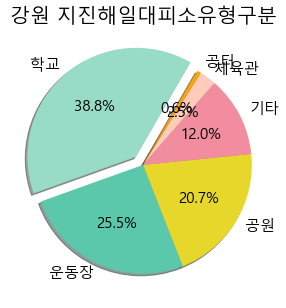

In [53]:
labels=['학교', '운동장', '공원', '기타', '체육관', '공터']
GW['지진해일대피소유형구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB', 'ORANGE']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0,0,0,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('강원 지진해일대피소유형구분', fontsize=20)
pylab.ylabel('')

In [55]:
## 5.지진해일대피소운영상태 분석

In [56]:
GW['지진해일대피소운영상태'].value_counts()

Y    518
Name: 지진해일대피소운영상태, dtype: int64

### 강원지도

In [57]:
map = folium.Map(location=[37.8228, 128.1555], zoom_start = 10)
fg = folium.FeatureGroup(name = '강원지진해일대피소')
for lat, lon, name in zip(GW['위도_x'], GW['경도_x'], GW['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'star', color= 'blue', icon_color = 'white')))
map.add_child(fg) 
map.save(outfile='공공데이터 강원.html')

## 8. 지역별 인구수 대비 최대수용가능 인원수 비교

In [58]:
GW['주민대피지구내거주인수'].value_counts()

0.0       5
20.0      2
27.0      2
14.0      2
15.0      2
17.0      2
32.0      1
21.0      1
13.0      1
16.0      1
2.0       1
3.0       1
1.0       1
34.0      1
35.0      1
289.0     1
487.0     1
41.0      1
28.0      1
30.0      1
188.0     1
99.0      1
353.0     1
627.0     1
636.0     1
445.0     1
227.0     1
131.0     1
173.0     1
2411.0    1
37.0      1
Name: 주민대피지구내거주인수, dtype: int64

In [59]:
GW.sample(10)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도_x,경도_x,수용가능면적,최대수용인원수,...,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area
370,경동대학교 고지대,지진해일대피소,옥외대피소,기타,강원도 고성군 토성면 봉포리 306-3,강원도 고성군 토성면 봉포리 306-3,38.2516,128.556,92130.0,2000.0,...,1.0,1.0,52.0,강원도 고성군청,033-680-3753,2018-08-20,4340000,강원도 고성군,NaN,강원도
167,해망정공터,지진해일대피소,지진해일 긴급대피장소,공터,강원도 삼척시 근덕면 용화리 192-2,강원도 삼척시 근덕면 용화리 192-2,37.2887,129.303,330.0,100.0,...,NaN,NaN,NaN,삼척시,033-570-3887,2019-06-30,1741000,행정안전부,NaN,강원도
377,고원실내체육관,지진대피소,실내대피소,체육관,강원도 태백시 문곡동 산29-0,NaN,37.1338,129.007,8765.0,2656.0,...,0.0,0.0,0.0,강원도태백시청,033-550-3011,2019-06-14,4220000,강원도 태백시,NaN,강원도
181,오분마을회관뒤공터,지진해일대피소,지진해일 긴급대피장소,공터,강원도 삼척시 오분동 212,강원도 삼척시 오분동 212,37.4275,129.19,297.0,90.0,...,NaN,NaN,NaN,삼척시,033-570-3887,2019-06-30,1741000,행정안전부,NaN,강원도
55,묵호대교,지진해일대피소,옥외대피소,기타,강원도 동해시 발한동 80-303,강원도 동해시 발한동 80-303,37.5416,129.111,830.0,300.0,...,1.0,1.0,5.0,강원도동해시청,033-530-2313,2019-09-10,4210000,강원도 동해시,NaN,강원도
31,금메달주유소뒷산,지진해일대피소,옥외대피소,기타,강원도 삼척시 매원리 35-4번지,강원도 삼척시 매원리 35-4번지,37.3167,129.271,82.0,100.0,...,NaN,NaN,NaN,삼척시,033-570-3887,2019-05-24,4240000,강원도 삼척시,NaN,강원도
299,토성정수장 고지대,지진해일대피소,지진해일 긴급대피장소,공터,강원도 고성군 토성면 청간리 산36-3임,강원도 고성군 토성면 청간리 산36-3임,38.2652,128.555,330.0,100.0,...,NaN,NaN,NaN,고성군,033-680-3753,2019-06-30,1741000,행정안전부,NaN,강원도
115,수백초등학교 운동장,지진대피소,옥외대피소,학교,강원도 횡성군 공근면 공근남로 446,강원도 횡성군 공근면 수백리 341-3,37.5337,128.007,5145.0,6236.0,...,NaN,NaN,NaN,횡성군청 주민복지지원과,NaN,2018-12-24,4260000,강원도 횡성군,NaN,강원도
439,구래초등학교 운동장,지진대피소,옥외대피소,운동장,강원도 영월군 상동읍 교촌길 20,NaN,37.1419,128.839,4030.0,1221.0,...,NaN,NaN,NaN,구래초등학교,NaN,2018-08-29,4270000,강원도 영월군,NaN,강원도
244,주문진성당,지진해일대피소,지진해일 긴급대피장소,기타,강원도 강릉시 주문진읍 교항리 산56,강원도 강릉시 주문진읍 교항리 산56,37.8854,128.822,990.0,300.0,...,NaN,NaN,NaN,강릉시,033-640-5518,2019-06-30,1741000,행정안전부,NaN,강원도


In [135]:
ppl = pd.read_csv('강원_인구수.csv', encoding = "CP949")

# http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3

In [136]:
ppl.head()

,행정구역(시군구)별,2019. 09
0,행정구역(시군구)별,총인구수 (명)
1,강원도,1540721
2,춘천시,280502
3,원주시,347762
4,강릉시,213530


In [137]:
ppl = ppl.drop([ppl.index[0], ppl.index[1]])
ppl

,행정구역(시군구)별,2019. 09
2,춘천시,280502
3,원주시,347762
4,강릉시,213530
5,동해시,90472
6,태백시,44092
7,속초시,81773
8,삼척시,67721
9,홍천군,69271
10,횡성군,46704
11,영월군,39176


In [138]:
# 분석 쉽도로 컬럼명 변경 
ppl = ppl.rename(columns={'행정구역(시군구)별': 'sigungu', '2019. 09': 'population'}) #nop: number of people
ppl

,sigungu,population
2,춘천시,280502
3,원주시,347762
4,강릉시,213530
5,동해시,90472
6,태백시,44092
7,속초시,81773
8,삼척시,67721
9,홍천군,69271
10,횡성군,46704
11,영월군,39176


In [139]:
# 서울 구 이름 앞에 서울특별시 붙여넣기
ppl['sigungu'] = '강원도' + ' ' + ppl.sigungu.str[0:]

In [140]:
ppl

,sigungu,population
2,강원도 춘천시,280502
3,강원도 원주시,347762
4,강원도 강릉시,213530
5,강원도 동해시,90472
6,강원도 태백시,44092
7,강원도 속초시,81773
8,강원도 삼척시,67721
9,강원도 홍천군,69271
10,강원도 횡성군,46704
11,강원도 영월군,39176


In [141]:
# 제공기관명이 시이름 + 구이름 으로 되어 있어서 이 컬럼을 기준으로 join 할 예정
GW.제공기관명.unique()

array(['강원도 양구군', '강원도 삼척시', '강원도 동해시', '강원도 횡성군', '강원도 강릉시', '행정안전부',
       '강원도 고성군', '강원도 태백시', '강원도 화천군', '강원도 춘천시', '강원도 영월군', '강원도 속초시',
       '강원도 평창군'], dtype=object)

In [142]:
GW.최대수용인원수 = GW.최대수용인원수.astype(float)

In [143]:
# 인구테이블과 join하기 위해 필요한 두개 컬럼만 shelter_ppl이라는 테이블로 저장
shelter_ppl = GW[['최대수용인원수', '제공기관명']]

In [144]:
# 제공기관명으로 groupby해서 그 지역 내 모든 대피소 최대수용인원수 더하기
shelter_capacity_temp= pd.DataFrame(shelter_ppl.groupby('제공기관명')['최대수용인원수'].sum())

In [145]:
shelter_capacity_temp

,최대수용인원수
제공기관명,
강원도 강릉시,58550.0
강원도 고성군,20540.0
강원도 동해시,15730.0
강원도 삼척시,6425.0
강원도 속초시,32180.0
강원도 양구군,113160.0
강원도 영월군,30169.0
강원도 춘천시,96768.0
강원도 태백시,15902.0


In [146]:
find_missing_area = ppl.merge(shelter_capacity_temp, how='left', left_on=['sigungu'], right_on=['제공기관명'])

In [147]:
find_missing_area[find_missing_area['최대수용인원수'].isnull()] 

,sigungu,population,최대수용인원수
1,강원도 원주시,347762,NaN
7,강원도 홍천군,69271,NaN
11,강원도 정선군,37351,NaN
12,강원도 철원군,45578,NaN
15,강원도 인제군,31715,NaN
17,강원도 양양군,27694,NaN


In [148]:
# join 하기
shelter_capacity = shelter_capacity_temp.merge(ppl, how='left', left_on=['제공기관명'], right_on=['sigungu'])

In [149]:
shelter_capacity

,최대수용인원수,sigungu,population
0,58550.0,강원도 강릉시,213530
1,20540.0,강원도 고성군,27320
2,15730.0,강원도 동해시,90472
3,6425.0,강원도 삼척시,67721
4,32180.0,강원도 속초시,81773
5,113160.0,강원도 양구군,23121
6,30169.0,강원도 영월군,39176
7,96768.0,강원도 춘천시,280502
8,15902.0,강원도 태백시,44092
9,62414.0,강원도 평창군,42259


In [150]:
# 분석 용이하게 하기 위해 컬럼명 변경 
shelter_capacity.rename(columns={'최대수용인원수':'max'}, inplace=True)

In [151]:
len(shelter_capacity)

13

In [152]:
shelter_capacity.columns

Index(['max', 'sigungu', 'population'], dtype='object')

In [153]:
# max 컬럼이 float64이기때문에 정확한 비교를 위해 타입 변경
shelter_capacity['population'] = shelter_capacity['population'].astype('float64')

In [154]:
shelter_capacity['max'] = shelter_capacity['max'].astype('float64')

In [155]:
shelter_capacity

,max,sigungu,population
0,58550.0,강원도 강릉시,213530.0
1,20540.0,강원도 고성군,27320.0
2,15730.0,강원도 동해시,90472.0
3,6425.0,강원도 삼척시,67721.0
4,32180.0,강원도 속초시,81773.0
5,113160.0,강원도 양구군,23121.0
6,30169.0,강원도 영월군,39176.0
7,96768.0,강원도 춘천시,280502.0
8,15902.0,강원도 태백시,44092.0
9,62414.0,강원도 평창군,42259.0


In [156]:
shelter_capacity[shelter_capacity['population']>shelter_capacity['max']]

,max,sigungu,population
0,58550.0,강원도 강릉시,213530.0
1,20540.0,강원도 고성군,27320.0
2,15730.0,강원도 동해시,90472.0
3,6425.0,강원도 삼척시,67721.0
4,32180.0,강원도 속초시,81773.0
6,30169.0,강원도 영월군,39176.0
7,96768.0,강원도 춘천시,280502.0
8,15902.0,강원도 태백시,44092.0
10,24200.0,강원도 화천군,24680.0


In [157]:
shelter_capacity['diff'] = shelter_capacity['max']-shelter_capacity['population']

In [158]:
shelter_capacity['diff'].max()

102999.0

In [159]:
shelter_capacity['diff'].min()

-183734.0

In [160]:
# 값이 마이너스면 불충분, 플러스면 충분으로 지정
shelter_capacity['capacity'] = shelter_capacity['diff'].apply(lambda x: '불충분' if x<0 else '충분' )

In [161]:
shelter_capacity.sort_values('population', ascending = False).head(5)

,max,sigungu,population,diff,capacity
7,96768.0,강원도 춘천시,280502.0,-183734.0,불충분
0,58550.0,강원도 강릉시,213530.0,-154980.0,불충분
2,15730.0,강원도 동해시,90472.0,-74742.0,불충분
4,32180.0,강원도 속초시,81773.0,-49593.0,불충분
3,6425.0,강원도 삼척시,67721.0,-61296.0,불충분


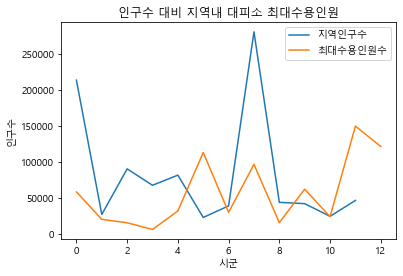

In [162]:
line_chart1 = plt.plot(shelter_capacity['population'])
line_chart2 = plt.plot(shelter_capacity['max'])
plt.title('인구수 대비 지역내 대피소 최대수용인원')
plt.xlabel('시군')
plt.ylabel('인구수')
plt.legend(['지역인구수', '최대수용인원수'], loc = 1)
plt.show()

In [163]:
shelter_capacity['capacity'].value_counts()

불충분    9
충분     4
Name: capacity, dtype: int64

Text(0, 0.5, '')

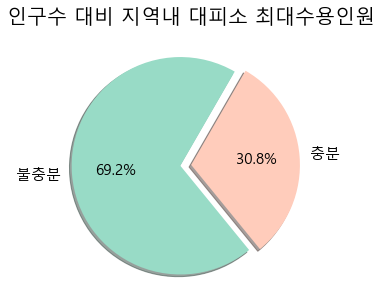

In [164]:
labels=['불충분', '충분']
shelter_capacity['capacity'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('인구수 대비 지역내 대피소 최대수용인원', fontsize=20)
pylab.ylabel('')

## 대피소 위치

In [165]:
# 지도 준비

map = Map(location=[37.82, 128.15], zoom_start=10)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [166]:
# 지도 준비

map = Map(location=[37.82, 128.15], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=2_250,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 255)',
        fill_color='rgb(0, 0, 255)',
        fill_opacity=0.01,
    )
    marker.add_to(map)

map

In [167]:
# 지도 준비

map = Map(location=[37.82, 128.15], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=750,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 255)',
        fill_color='rgb(0, 0, 255)',
        fill_opacity=0.1,
    )
    marker.add_to(map)

map

In [ ]:
# table = pd.read_csv('상권배후지-추정유동인구(2019년).csv', encoding = "CP949")

In [168]:
shelter_capacity['gu']=shelter_capacity['sigungu'].str.split(' ').str[1]
shelter_capacity['diff_map'] = shelter_capacity['population']-shelter_capacity['max']

import json
import matplotlib.pyplot as plt

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.

map = folium.Map(location=[37.82, 128.15], zoom_start=11,
                tiles='stamentoner')
map.choropleth(geo_data=geo_str,
              data=shelter_capacity, #내가 원하는 데이터를 넣어주세요 
              columns=['gu', 'diff_map'], #앞에는 인덱스, 뒤에는 data에 있는 정보를 그대로 넣어주세요 
              fill_color='YlOrRd',
              key_on='feature.properties.name')
map

FileNotFoundError: [Errno 2] No such file or directory: 'skorea_municipalities_geo_simple.json'

In [ ]:
import json
import matplotlib.pyplot as plt

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='stamentoner')
map.choropleth(geo_data=geo_str,
              data=sgd['tmzon_4_flpop_co'], #내가 원하는 데이터를 넣어주세요 
              columns=[sgd.index,sgd['tmzon_4_flpop_co']], #앞에는 인덱스, 뒤에는 data에 있는 정보를 그대로 넣어주세요 
              fill_color='YlGnBu',
              key_on='feature.id')
map